/Users/gedena/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-28 14:17:22.021117: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-28 14:17:22.021415: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


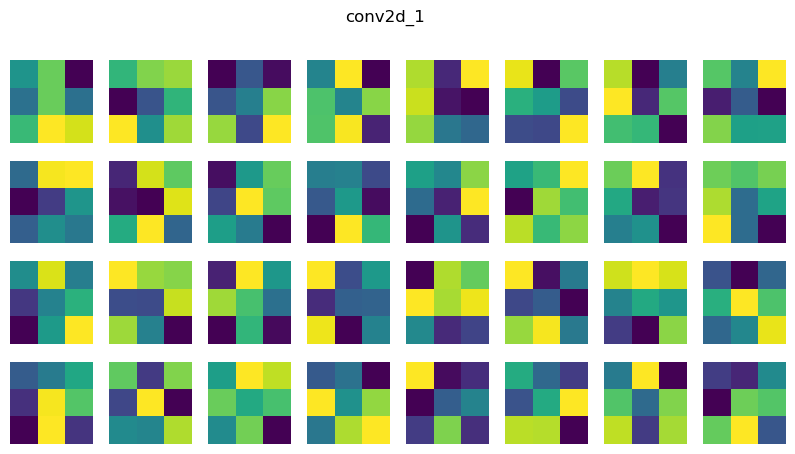

Epoch 1/3


2023-02-28 14:17:22.721698: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-28 14:17:22.983644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 0.4687 - accuracy: 0.8289

2023-02-28 14:17:37.722439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.4684 - accuracy: 0.8290 - val_loss: 0.3581 - val_accuracy: 0.8683
Epoch 2/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3160 - accuracy: 0.8851 - val_loss: 0.3117 - val_accuracy: 0.8868
Epoch 3/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2709 - accuracy: 0.9009 - val_loss: 0.2831 - val_accuracy: 0.8962


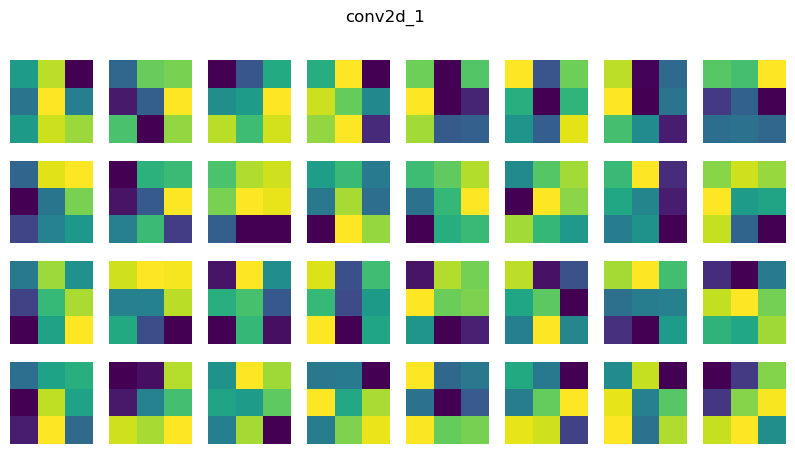

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv2d_1'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling2d_1'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'),
    tf.keras.layers.MaxPooling2D((2, 2), name='max_pooling2d_2'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name='conv2d_3'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a function to display the convolutional filters as matrices of numbers
def display_convolutional_filters(layer_name):
    layer = model.get_layer(name=layer_name)
    weights = layer.get_weights()[0]
    fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(10, 5))
    fig.suptitle(layer_name)
    for i in range(4):
        for j in range(8):
            axs[i][j].imshow(weights[:, :, 0, i * 8 + j])
            axs[i][j].axis('off')
            axs[i][j].set_xticklabels([])
            axs[i][j].set_yticklabels([])
            axs[i][j].set_aspect('equal')
        
# Display the convolutional filters before training
display_convolutional_filters('conv2d_1')
plt.show()

# Train the model
history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

# Display the convolutional filters after training
display_convolutional_filters('conv2d_1')
plt.show()
